In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


In [2]:

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    'dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.


In [3]:

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(15, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5088 - loss: 1.7324 - val_accuracy: 0.8460 - val_loss: 0.5342
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9133 - loss: 0.3065 - val_accuracy: 0.8799 - val_loss: 0.4120
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9648 - loss: 0.1453 - val_accuracy: 0.8930 - val_loss: 0.3880
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9869 - loss: 0.0888 - val_accuracy: 0.8825 - val_loss: 0.3726
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9907 - loss: 0.0609 - val_accuracy: 0.8982 - val_loss: 0.3645
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9988 - loss: 0.0326 - val_accuracy: 0.8930 - val_loss: 0.3742
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 1.0000 - loss: 0.0236 - val_accuracy: 0.9034 - val_loss: 0.3596
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9994 - loss: 0.0176 - val_accuracy: 0.8851 - val_loss:

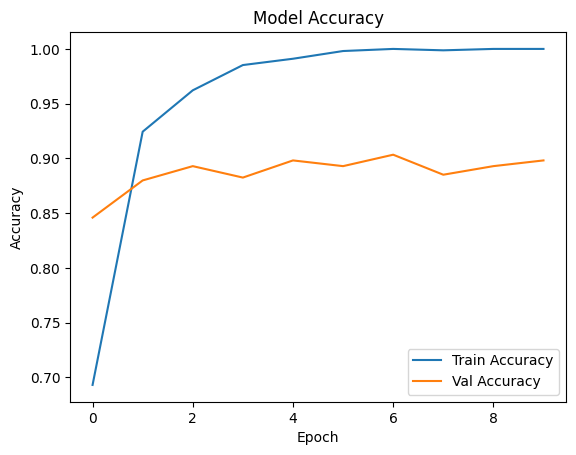

In [5]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [6]:

from tensorflow.keras.preprocessing import image

img_path = r"D:\COLLEGE\intership unifid\Animal Classification\dataset\Cow\Cow_9_2.jpg"  # Replace with actual path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]
print("Predicted Animal:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Animal: Cow
